In [3]:
#!pip3 install multiprocess
from multiprocessing import Pool
import math
import numpy as np
import pandas as pd
# !pip3 install tqdm

import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
def arrangement_1(nleds,d):

    l=math.sqrt(nleds);

    ledcord=np.zeros((2,nleds));

    temp=0;
    for k in range(nleds):
        ledcord[0,k]=-(l-1)*d/2 +((k)%l)*d;
        if (k)%l ==0 and k != 0:
            temp=temp+1;
        ledcord[1,k]=-(l-1)*d/2 + temp*d;

    return ledcord

def E_xy_cent(ledcord,nleds,Ir_0,z,d):
    
    x=0;
    y=0;
    E=0;
    for i in range(nleds):
        den=np.square(np.square(x-ledcord[0,i]) +np.square(y-ledcord[1,i]) +z**2);
        E= E + (z**2 * Ir_0)*(np.reciprocal(den));

    return E;
    
def E_xy_end(ledcord,nleds,Ir_0,z,d,x_end):
    
    x=x_end;
    y=0;
    E=0;
    for i in range(nleds):
        den=np.square(np.square(x-ledcord[0,i]) +np.square(y-ledcord[1,i]) +z**2);
        E= E + (z**2 * Ir_0)*(np.reciprocal(den));

    return E;

def plot_E_xy_full(ledcord,nleds,Ir_0,z,d):
    l=math.sqrt(nleds)
    x = np.arange(-10, 10, 0.01)
    y = np.arange(-10, 10, 0.01)

    x,y=np.meshgrid(x, y, sparse=False, indexing='ij')

    E=np.zeros(np.size(x));

    for i in range(nleds):
        den=np.square(np.square(x-ledcord[0,i]) +np.square(y-ledcord[1,i]) +z**2);
        E= E + (z**2 * Ir_0)*(np.reciprocal(den));
        
    return E;

#     s=surface(x,y,E);
#     xlabel('x-coordinate(m)');
#     ylabel('y-coordinate(m)');
#     zlabel('Irradinace(W/m^2)');
#     s.EdgeColor = 'none';


In [3]:
nleds=49;
Ir_0 = 1;
d=0.122292;
z=0.05;
ledcord = arrangement_1(nleds,d);
x_end=0.0;
print(E_xy_end(ledcord,nleds,Ir_0,z,d,x_end))

450.9825479895467


In [4]:
Ir_0 = 1;

# print(plot_E_xy_full(ledcord,nleds,Ir_0,z,d))
# E_cent=E_xy_cent(ledcord,nleds,Ir_0,z,d)
# E_half = E_cent/2
# E_99 = E_cent * 0.99
# x_half = 0
# x_99 = 0
# x_half_flag = False
# x_99_flag = False

final_list = []


def ratio(d):
#     for d in np.linspace(0.01,0.2,38):
    final_list = []
    for nleds in [1,9,25,49,81,121,169]:
        ledcord = arrangement_1(nleds,d)
        for z in np.linspace(0.05,0.5,45):
            E_cent = E_xy_cent(ledcord,nleds,Ir_0,z,d)
            E_half = E_cent/2
            E_99 = E_cent * 0.99
            x_half = 0
            x_99 = 0
            x_half_flag = False
            x_99_flag = False

            for x_end in np.linspace(0,5,10000):



                E_end=E_xy_end(ledcord,nleds,Ir_0,z,d,x_end)

                if E_end < E_half and not x_half_flag:
                    x_half = x_end
                    x_half_flag = True

                if E_end < E_99 and not x_99_flag:
                    x_99 = x_end
                    x_99_flag = True

            final_list.append([nleds,d,z,E_cent,E_99, x_99,E_half,x_half])
    return final_list

with Pool(10) as p:
      l = list(tqdm(p.imap(ratio,np.linspace(0.01,0.2,38)), total=38))
# pool=Pool();
# l=pool.map(ratio,np.linspace(0.01,0.2,10))
# #     ratio(d)

100%|██████████| 38/38 [2:13:05<00:00, 210.14s/it]  


In [2]:
t=[]
for i in l:
    t.extend(i)
    print(len(i))
final_list=t


NameError: name 'l' is not defined

In [41]:
df = pd.DataFrame(final_list,columns=["nleds","d","z","E_cent","E_99","x_99","E_half","x_half"])
df = df.drop_duplicates()

In [42]:
df["ratio"]=df["x_99"]/df["x_half"]

In [43]:
len(df["E_half"].unique())

10305

In [44]:

df.shape
28980/38

762.6315789473684

In [45]:
df.drop_duplicates().shape
11970/38

315.0

In [47]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
# df

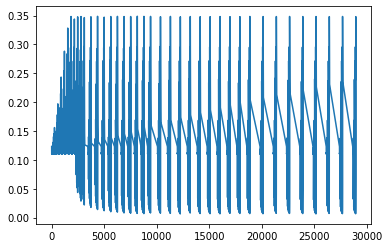

In [52]:
plt.plot(df["ratio"])

In [49]:
len(df["ratio"].unique())

8230

In [50]:
# ratio_max=max(df["ratio"])
# df
df.shape

(11970, 9)

In [57]:
idx = df.groupby(['nleds'])['ratio'].transform(max) == df['ratio']
df[idx][df[idx]["nleds"] != 1].sort_values("nleds")
# df[idx][df[idx]["nleds"] != 1].groupby("nleds").mean()

,nleds,d,z,E_cent,E_99,x_99,E_half,x_half,ratio
1620,9,0.035676,0.050000,1495.376406,1480.422642,0.008501,747.688203,0.059506,0.142857
2297,25,0.045946,0.070455,1150.356236,1138.852674,0.020502,575.178118,0.120012,0.170833
21256,49,0.169189,0.213636,100.014195,99.014054,0.144014,50.007098,0.597060,0.241206
5540,81,0.076757,0.101136,500.878094,495.869313,0.094509,250.439047,0.347035,0.272334
10316,121,0.112703,0.162500,234.758471,232.410886,0.184518,117.379236,0.622562,0.296386
8153,169,0.097297,0.131818,321.598035,318.382055,0.221022,160.799018,0.633563,0.348856


In [1]:
ef=df[df["ratio"] == df["ratio"].max()]
max(ef["E_cent"])

NameError: name 'df' is not defined